In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
import control as ct
from control.matlab import *

In [17]:
def getModeloMinimo(p_1: float, p_2: float, p_3: float, g_e: float, i_e: float):
    
    def modeloMinimoStateUpdateFun(t, c, u, params):
        p_1 = params["p_1"]
        p_2 = params["p_2"]
        p_3 = params["p_3"]
        g_e = params["g_e"]
        i_e = params["i_e"]
        
        c_constrained = np.clip(c, [0, 0], float.)
        u_constrained = np.clip(u, i_e)
        
        dc_0 = -p_1*c_constrained[0] + c_constrained[1]*c[0] + p_1*g_e
        dc_1 = -p_2*c_constrained[1] + p_3*(u_constrained[0]-i_e)
        
        dc_dt = np.array([dc_0, dc_1]).reshape(-1)
        return dc_dt
    
    def modeloMinimoStateOutputFun(t, c, u, params):
        return c
    
    params_dict = {
        "p_1": p_1,
        "p_2": p_2,
        "p_3": p_3,
        "g_e": g_e,
        "i_e": i_e
    }
    
    system = ct.NonlinearIOSystem(
        updfcn = modeloMinimoStateUpdateFun,
        outfcn = modeloMinimoStateOutputFun,
        inputs = ["u"],
        outputs = ["c_g", "c_i"],
        states = ["c_g", "c_i"],
        dt = 0,
        name = "Modelo Mínimo",
        params = params_dict
    )
    
    return system

In [18]:
parametros_normais = {
    "p_1": 180/60,
    "p_2": 200/60,
    "p_3": 300/60,
    "g_e": .85,
    "i_e": .4
}

dinamicaNormal = getModeloMinimo(**parametros_normais)

TypeError: clip() missing 1 required positional argument: 'a_max'

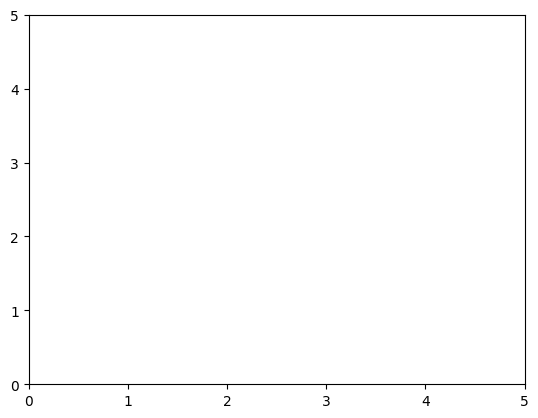

In [19]:
phase_plote_boundries = [0.0, 5, 0.0, 5]
ct.phase_plane_plot(dinamicaNormal, 
                    pointdata=phase_plote_boundries,
                    plot_streamlines=True,
                    plot_equilpoints=True,
                    plot_separatrices=True)

In [14]:
estado_inidial = [10, 10]

ct.find_eqpt(dinamicaNormal, x0=estado_inidial, u0=.4)

(array([8.50000000e-01, 5.66221279e-35]), array([0.4]))

In [5]:
respostaAoImpulso_dinamicaNormal = ct.step_response(dinamicaNormal, T=180, return_x=True)


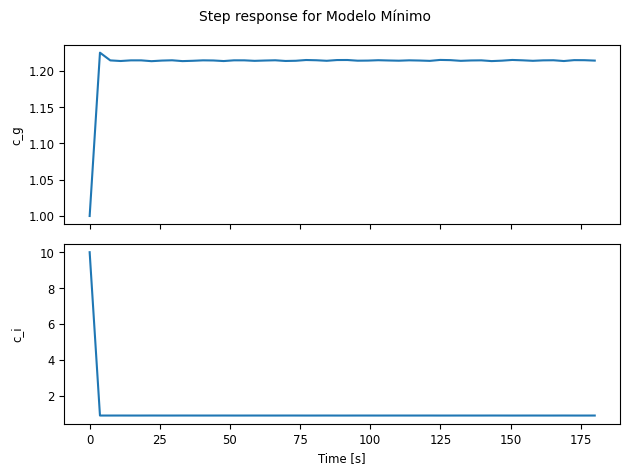

In [6]:
estado_inidial = [1, 10]

respostaAoDegrau_dinamicaNormal = ct.step_response(dinamicaNormal, T=180, return_x=True, X0=estado_inidial)

step_plots = ct.time_response_plot(respostaAoDegrau_dinamicaNormal)

In [7]:
ct.impulse_response

<function control.timeresp.impulse_response(sys, T=None, input=None, output=None, T_num=None, transpose=False, return_x=False, squeeze=None)>